In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_13656\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [12]:
m10_v15_L3_s2=torch.tensor([[[  8.2503,  54.0490,  65.2716,  74.0639,  88.2960, 100.0000,  83.2533],
         [ 13.4575,  31.6929,  49.7942,  73.6850,  87.7219,  99.9155,  93.9867],
         [  6.0800,  17.2993,  41.1044,  71.0017,  84.8312,  99.5612,  94.8300],
         [  6.0262,  62.2222,  48.0781,  75.0000,  85.2607,  99.6526,  97.7867],
         [  6.3373,   0.0000,  46.1683,  16.6667,  86.5897,  99.8008,  98.8333],
         [ 38.9683,   0.0000,  50.0735,   0.0000,  85.3994,  99.8684,  99.5200],
         [  9.5238,   0.0000,  41.0053,  33.3333,  77.5990,  99.8491,  99.6467],
         [  0.0000,   0.0000,  42.8571,  33.3333,  85.4902,  99.8997,  99.8100],
         [  0.0000,   0.0000,  50.0000,   0.0000,  66.6667,  99.9299,  99.8900],
         [  0.0000,   0.0000,  11.1111,   0.0000,  93.3333,  99.9366,  99.9200]],

        [[ 11.8318,  34.7730,  55.5753,  54.1789,  82.0749,  99.5745,  62.9433],
         [  6.9508,  20.4110,  47.2493,  57.9425,  85.1987,  98.4576,  72.6767],
         [  7.3590,  20.5723,  43.8329,  40.5852,  77.5926,  98.9488,  81.7800],
         [ 10.4376,  16.9304,  34.6546,  35.3097,  72.2329,  98.4717,  87.9567],
         [ 12.1863,  19.3845,  37.2704,  39.6314,  72.6762,  99.2780,  93.8167],
         [  5.5556,  10.9104,  38.0874,  39.5833,  71.8151,  99.4258,  96.5867],
         [  0.0000,  16.2698,  37.6053,  61.8182,  74.1723,  99.6934,  98.5533],
         [ 33.3333,  33.3333,  38.8838,  41.6667,  73.5237,  99.7729,  99.2200],
         [  0.0000,   0.0000,  30.0000,   0.0000,  68.0140,  99.8389,  99.5967],
         [  0.0000,   0.0000,  33.3333,   0.0000,  68.7507,  99.8763,  99.7767]],

        [[  9.0203,  25.4926,  44.2750,  47.0258,  73.2336,  90.1818,  21.2433],
         [  9.5829,  19.7622,  39.9980,  36.3708,  63.4967,  81.7189,  28.8500],
         [  9.2568,  17.2328,  36.2358,  29.1093,  53.9705,  85.7604,  39.5167],
         [  9.5893,  16.0176,  31.5179,  26.5175,  56.6430,  90.5214,  54.8933],
         [ 10.7414,  16.2940,  33.8816,  27.1143,  59.9789,  94.4176,  72.6567],
         [ 15.6193,  22.1882,  37.8522,  38.5682,  69.0309,  97.3134,  87.0667],
         [  9.7884,  34.0266,  49.2091,  53.3333,  77.5278,  98.9994,  95.3567],
         [ 33.3333,  38.3117,  58.9692,  67.8391,  85.3660,  99.6661,  98.6933],
         [  0.0000,   0.0000,  56.0185,  61.2698,  86.3238,  99.8168,  99.5467],
         [  0.0000,   0.0000,  61.1111,  50.0000,  83.9641,  99.8493,  99.7700]],

        [[  9.6815,  22.6707,  52.4843,  47.9850,  86.9841,  33.3333,  11.7733],
         [  8.8160,  20.6469,  34.9826,  39.9661,  62.6986,  89.5833,  13.5367],
         [  9.4636,  17.1571,  32.1185,  30.3346,  51.6247,  79.0161,  19.6467],
         [  9.7100,  15.1158,  28.8924,  23.6764,  44.5536,  73.5033,  27.8200],
         [ 12.2827,  15.5251,  29.5124,  21.5409,  45.4780,  77.6675,  43.6200],
         [ 12.9680,  24.3267,  40.3800,  40.0033,  63.2780,  92.0748,  73.5767],
         [ 52.5926,  55.3423,  69.3054,  74.0327,  87.4991,  98.9958,  95.5867],
         [  0.0000,  85.0000,  90.1997,  86.8525,  94.4980,  99.7269,  99.3700],
         [  0.0000,   0.0000,  66.6667, 100.0000,  94.9585,  99.8586,  99.8067],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9200,  99.9200]],

        [[  9.7938,  34.3636,  48.7500,  88.8889,  66.6667,   0.0000,  10.6000],
         [ 10.1062,  21.9552,  41.4932,  34.5604,  70.2590,  50.0000,  11.6133],
         [ 10.1841,  16.9532,  31.0589,  28.0314,  45.9393,  67.5926,  13.1600],
         [ 10.2498,  15.5983,  27.4002,  22.4983,  38.7450,  61.6634,  17.3567],
         [ 10.1462,  14.2269,  23.7440,  19.6326,  31.7107,  50.8898,  23.6233],
         [ 15.5296,  23.8616,  34.1019,  32.5783,  50.2184,  76.4008,  54.5700],
         [ 58.3333,  71.1933,  87.1794,  85.7313,  94.4119,  99.1652,  97.5133],
         [  0.0000,  66.6667, 100.0000, 100.0000,  98.3436,  99.8103,  99.7633],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9600,  99.9600],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9900,  99.9900]],

        [[ 10.2319,  22.6399,  43.1217,  50.0000,   0.0000,   0.0000,  10.3933],
         [ 10.2923,  21.9344,  56.5062,  50.0000, 100.0000,   0.0000,  10.8100],
         [  9.5529,  19.0630,  37.3358,  32.9057,  40.7407,   0.0000,  10.8533],
         [ 10.0025,  16.6460,  30.6750,  26.4956,  39.3059,  77.7778,  12.8967],
         [ 10.2125,  12.5690,  23.3804,  17.5626,  28.6544,  43.4866,  14.9600],
         [ 13.3421,  14.7473,  20.3160,  18.1389,  23.6098,  28.0055,  21.5800],
         [  0.0000, 100.0000,  98.0937,  98.9522,  98.7284,  99.3651,  99.2633],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9800,  99.9800],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]]])
m10_v30_L3_s2=torch.tensor([[[1.0000e+02, 9.8144e+01, 7.6163e+01, 2.5000e+01, 2.1882e-02,
          5.1960e+01],
         [1.0000e+02, 9.2027e+01, 5.8962e+01, 2.4051e+01, 1.4749e+00,
          8.8190e+01],
         [1.0000e+02, 8.8877e+01, 4.0105e+01, 1.3953e+01, 1.2397e+00,
          9.2820e+01],
         [9.9921e+01, 9.0579e+01, 4.6011e+01, 3.3333e+01, 0.0000e+00,
          9.5450e+01],
         [9.9726e+01, 8.8095e+01, 4.3200e+01, 0.0000e+00, 1.8868e+00,
          9.8090e+01],
         [9.9846e+01, 7.7305e+01, 3.5484e+01, 0.0000e+00, 0.0000e+00,
          9.8690e+01],
         [9.9868e+01, 8.8235e+01, 3.5897e+01, 0.0000e+00, 0.0000e+00,
          9.9450e+01],
         [9.9879e+01, 6.7500e+01, 5.0000e+01, 0.0000e+00, 0.0000e+00,
          9.9690e+01],
         [9.9880e+01, 7.5000e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00,
          9.9840e+01],
         [9.9920e+01, 6.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9880e+01]],

        [[1.0000e+02, 8.2829e+01, 4.3909e+01, 1.7320e+01, 1.4708e+00,
          2.4950e+01],
         [1.0000e+02, 8.8575e+01, 3.2985e+01, 7.2403e+00, 2.4955e+00,
          5.5500e+01],
         [9.9211e+01, 7.7159e+01, 3.1978e+01, 1.4789e+01, 3.8504e+00,
          6.9680e+01],
         [9.9136e+01, 7.1625e+01, 3.4815e+01, 8.5427e+00, 2.3454e+00,
          7.9930e+01],
         [9.8960e+01, 7.1823e+01, 2.9023e+01, 8.6022e+00, 3.5088e+00,
          8.8100e+01],
         [9.8965e+01, 7.2982e+01, 2.8409e+01, 1.6216e+01, 3.3898e+00,
          9.3390e+01],
         [9.9520e+01, 7.1269e+01, 3.7143e+01, 2.0000e+01, 1.0526e+01,
          9.7050e+01],
         [9.9679e+01, 7.6190e+01, 2.3944e+01, 0.0000e+00, 0.0000e+00,
          9.8430e+01],
         [9.9807e+01, 6.8841e+01, 3.4483e+01, 0.0000e+00, 0.0000e+00,
          9.9150e+01],
         [9.9859e+01, 7.1930e+01, 3.0000e+01, 0.0000e+00, 0.0000e+00,
          9.9630e+01]],

        [[1.0000e+02, 9.3548e+01, 6.0058e+01, 2.7546e+01, 4.2731e+00,
          9.3700e+00],
         [9.8901e+01, 8.5111e+01, 4.8592e+01, 1.7848e+01, 2.9922e+00,
          1.6490e+01],
         [8.8690e+01, 5.7109e+01, 2.9829e+01, 1.1683e+01, 4.3210e+00,
          2.2850e+01],
         [8.6829e+01, 5.3613e+01, 2.4631e+01, 1.0662e+01, 4.5455e+00,
          3.5810e+01],
         [9.4658e+01, 6.0429e+01, 2.6787e+01, 9.5850e+00, 4.3478e+00,
          5.5830e+01],
         [9.6564e+01, 6.1470e+01, 3.0611e+01, 8.6716e+00, 3.1746e+00,
          7.3840e+01],
         [9.8161e+01, 7.1242e+01, 3.3758e+01, 1.8182e+01, 1.0000e+01,
          8.8110e+01],
         [9.9001e+01, 7.9888e+01, 3.9256e+01, 1.2500e+01, 1.2500e+01,
          9.5360e+01],
         [9.9790e+01, 8.6618e+01, 5.6061e+01, 6.0000e+01, 5.0000e+01,
          9.8930e+01],
         [9.9858e+01, 8.5385e+01, 4.2857e+01, 0.0000e+00, 0.0000e+00,
          9.9590e+01]],

        [[1.0000e+02, 1.0000e+02, 6.5333e+01, 2.6398e+01, 2.9908e+00,
          4.2800e+00],
         [0.0000e+00, 8.2353e+01, 5.6579e+01, 1.8307e+01, 3.2654e+00,
          5.9300e+00],
         [8.1818e+01, 5.2632e+01, 2.7754e+01, 9.8506e+00, 3.7512e+00,
          7.3600e+00],
         [6.6667e+01, 3.9939e+01, 1.7695e+01, 7.2117e+00, 3.7994e+00,
          1.0820e+01],
         [7.6816e+01, 4.3614e+01, 1.8977e+01, 7.1339e+00, 2.7540e+00,
          2.3200e+01],
         [8.6220e+01, 4.7919e+01, 2.1981e+01, 9.4470e+00, 5.2716e+00,
          4.6050e+01],
         [9.6492e+01, 7.2419e+01, 4.1250e+01, 2.1192e+01, 6.9930e+00,
          7.8760e+01],
         [9.9075e+01, 8.5415e+01, 6.2238e+01, 4.2169e+01, 4.0000e+01,
          9.4940e+01],
         [9.9787e+01, 9.3433e+01, 7.8846e+01, 5.0000e+01, 0.0000e+00,
          9.9310e+01],
         [9.9960e+01, 9.6552e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00,
          9.9930e+01]],

        [[0.0000e+00, 1.0000e+02, 8.1818e+01, 2.1101e+01, 3.4012e+00,
          3.6900e+00],
         [0.0000e+00, 7.5000e+01, 6.7647e+01, 1.9874e+01, 3.0171e+00,
          3.8000e+00],
         [1.0000e+02, 4.2857e+01, 2.4684e+01, 9.8378e+00, 3.2465e+00,
          4.2600e+00],
         [8.7500e+01, 4.2373e+01, 1.7405e+01, 8.2211e+00, 3.1595e+00,
          5.7800e+00],
         [7.2832e+01, 3.7369e+01, 1.8055e+01, 8.0782e+00, 3.2647e+00,
          1.0980e+01],
         [6.2224e+01, 3.3348e+01, 1.5206e+01, 6.5513e+00, 4.8637e+00,
          2.1440e+01],
         [9.0202e+01, 6.6381e+01, 4.0230e+01, 2.0729e+01, 1.4815e+01,
          6.6890e+01],
         [9.9140e+01, 9.2693e+01, 7.8519e+01, 6.2857e+01, 1.4286e+01,
          9.6950e+01],
         [9.9928e+01, 9.8529e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00,
          9.9890e+01],
         [9.9980e+01, 1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.9980e+01]],

        [[0.0000e+00, 0.0000e+00, 1.0000e+02, 3.0612e+01, 3.3779e+00,
          3.5500e+00],
         [0.0000e+00, 0.0000e+00, 6.0000e+01, 2.4299e+01, 3.1250e+00,
          3.3800e+00],
         [0.0000e+00, 1.0000e+02, 4.4118e+01, 1.3536e+01, 3.3115e+00,
          3.8300e+00],
         [0.0000e+00, 0.0000e+00, 2.0800e+01, 7.9151e+00, 3.1575e+00,
          3.8700e+00],
         [2.5000e+01, 3.8095e+01, 1.7774e+01, 7.6923e+00, 3.3249e+00,
          5.5100e+00],
         [4.2718e+01, 2.5428e+01, 1.1382e+01, 5.5292e+00, 3.2148e+00,
          8.1600e+00],
         [5.5732e+01, 4.1097e+01, 2.7824e+01, 1.7203e+01, 1.4365e+01,
          3.6520e+01],
         [9.9443e+01, 9.7925e+01, 9.5890e+01, 1.0000e+02, 0.0000e+00,
          9.9220e+01],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+02],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+02]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



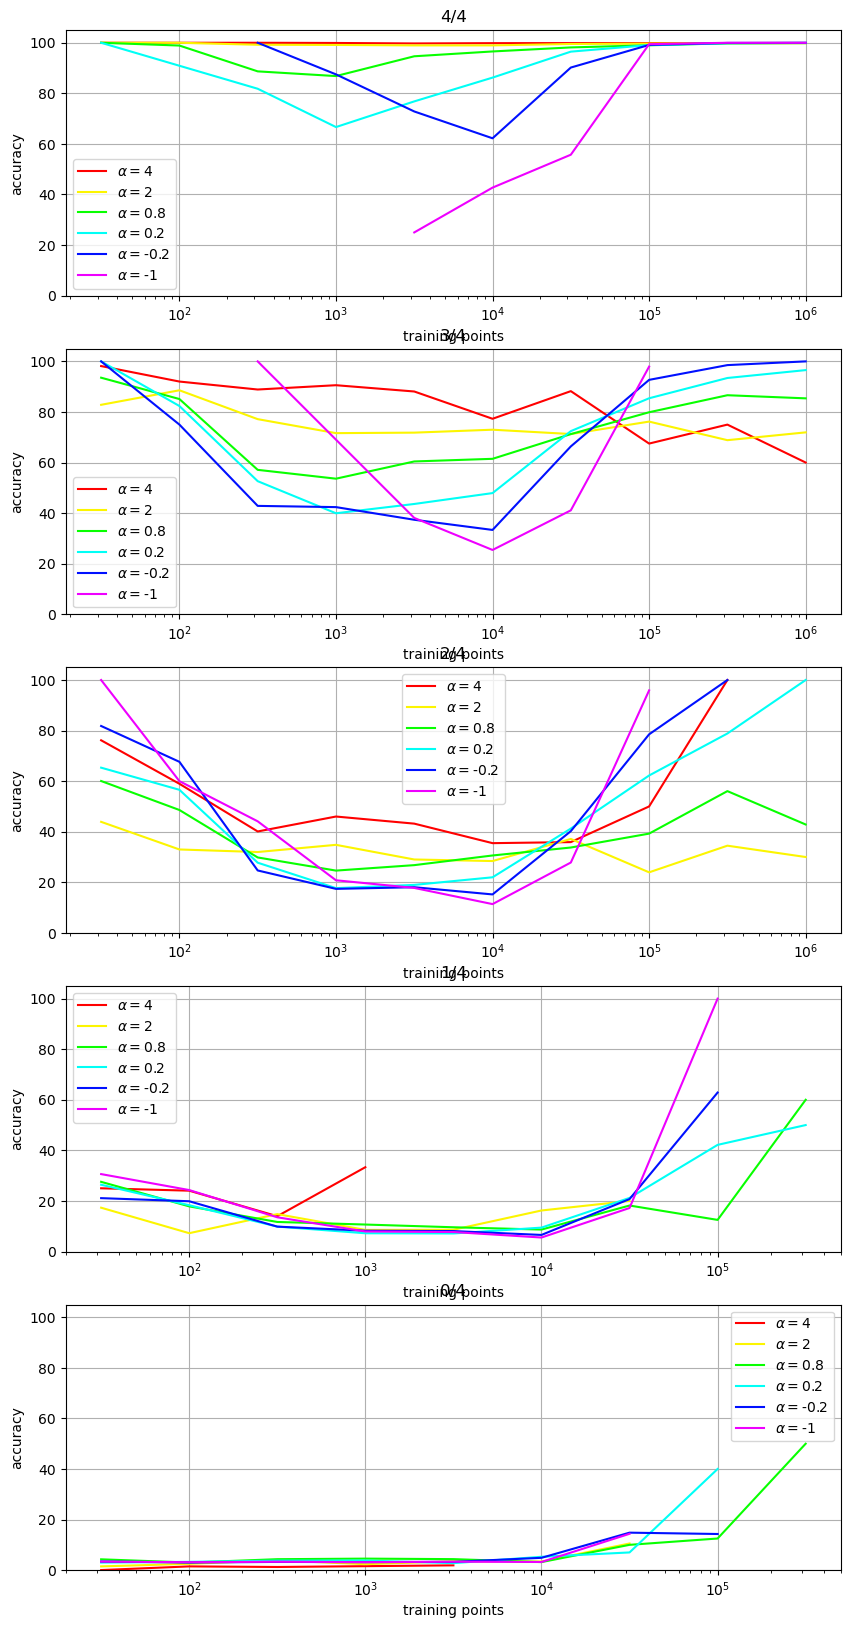

In [9]:
fig, axis = plt.subplots(5, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4","1/4","0/4"]
for i in range(5):  #i is how much path you see
    for j in range(6):  #j is how much temperature you see
        data = m10_v30_L3_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


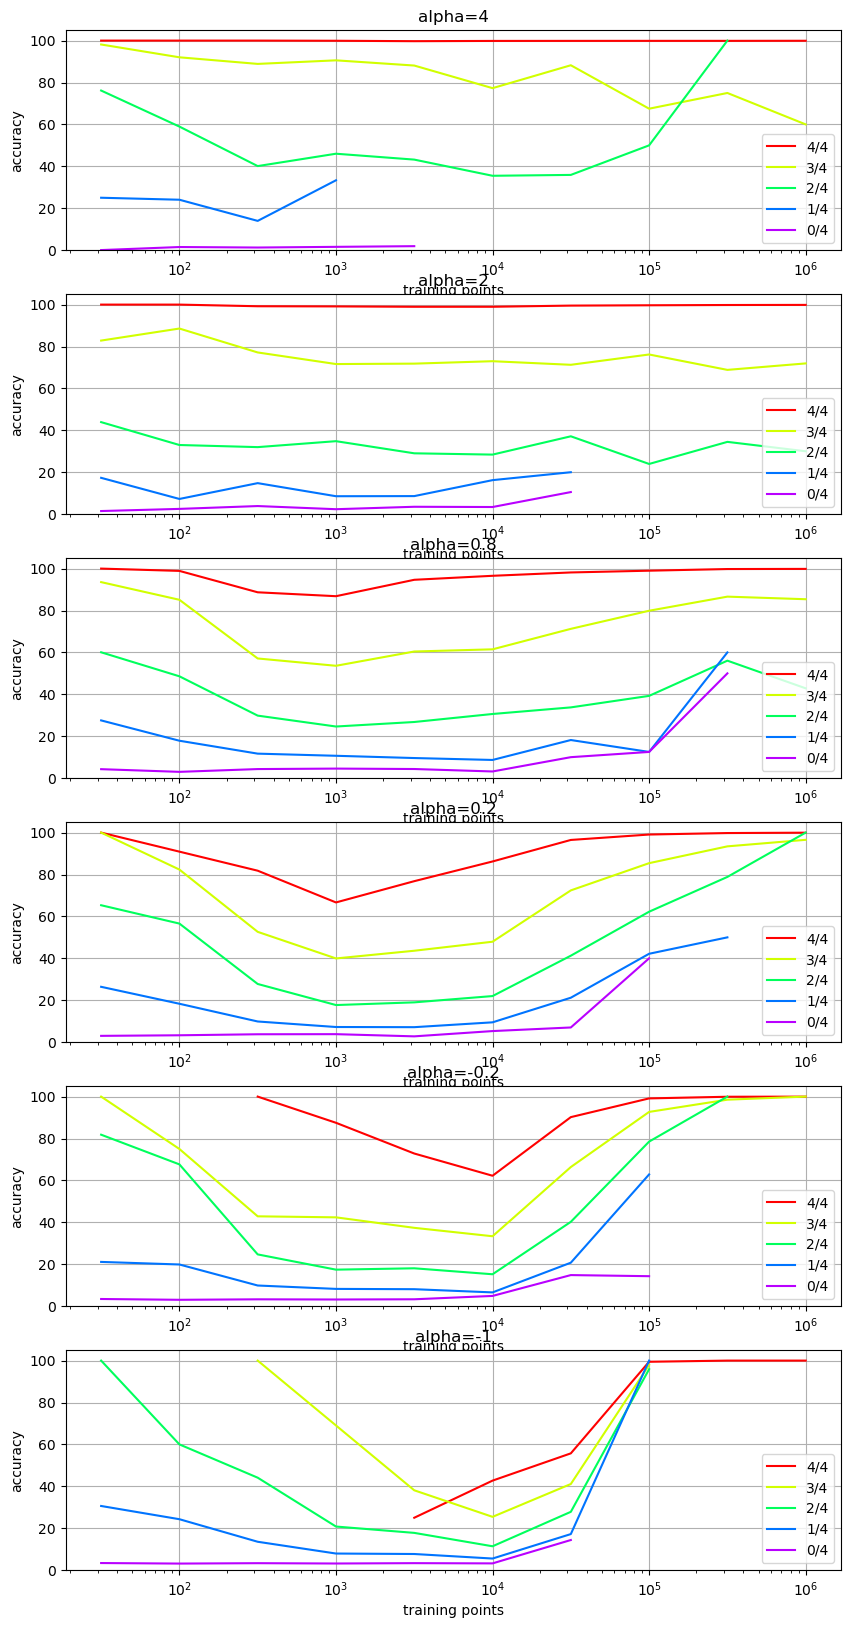

In [27]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4","1/4","0/4"]
for j in range(6):
    for i in range(5):
        data = m10_v30_L3_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    